<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Deep-Learning/blob/main/DL_P01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multilayer Perceptron**

Aim :- Write a program to implement multilayer perceptron using python.

Problem Definition :- The objective is to build a multilayer perceptron
(MLP) to classify iris flowers into three species (setosa, versicolor, or
virginica) based on their sepal length, sepal width, petal length, and
petal width.

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5332 - loss: 1.2171 - val_accuracy: 0.5833 - val_loss: 1.1967
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5381 - loss: 1.0605 - val_accuracy: 0.5833 - val_loss: 1.0772
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6067 - loss: 0.8461 - val_accuracy: 0.5833 - val_loss: 0.9552
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5939 - loss: 0.6991 - val_accuracy: 0.4167 - val_loss: 0.8462
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5226 - loss: 0.6566 - val_accuracy: 0.5000 - val_loss: 0.7594
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7668 - loss: 0.5694 - val_accuracy: 0.5000 - val_loss: 0.7025
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7482 - loss: 0.5094 - val_accuracy: 0.5000 - val_loss: 0.6606
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7542 - loss: 0.4682 - val_accuracy: 0.5000 - val_loss: 0.6302
E

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.95 KB)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 332 (1.30 KB)

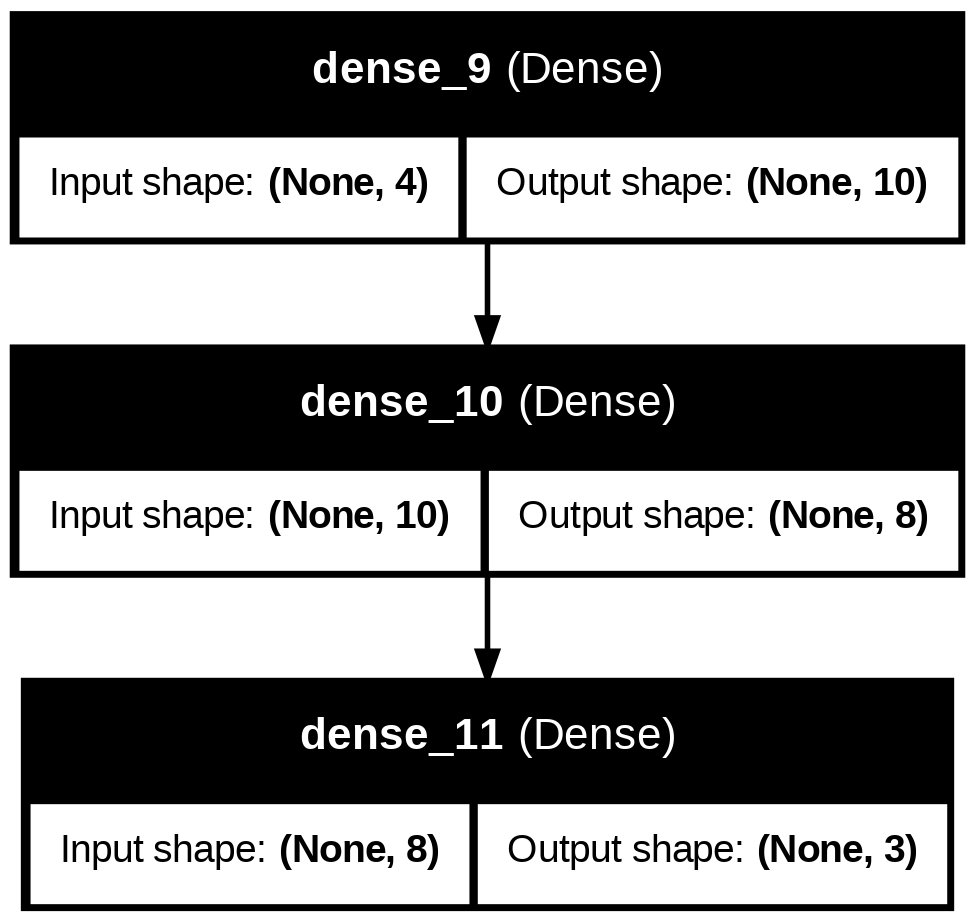

In [4]:
# Multilayer Perceptron (MLP) for Iris Classification

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # features: sepal length, sepal width, petal length, petal width
y = iris.target  # target: 0=setosa, 1=versicolor, 2=virginica

# 2. Preprocessing
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode target labels
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build the MLP Model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))   # hidden layer 1
model.add(Dense(8, activation='relu'))                      # hidden layer 2
model.add(Dense(3, activation='softmax'))                   # output layer (3 classes)

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.1, verbose=1)

# 6. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# 7. Example Prediction
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example iris flower (setosa)
sample = scaler.transform(sample)  # scale input
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)
print("Predicted class:", iris.target_names[predicted_class])

# 8. Test Loss
test_loss = history.history['val_loss'][-1]
print(f"Test Loss: {test_loss:.4f}")

# 9. Accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# 10. How many perceptron in this Neural Network
model.summary()

# 11. Build this neural network (Visualize)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)

